(                       close        day
 time                                   
 2023-09-28 03:00:00  149.334   Thursday
 2023-09-29 03:00:00  149.314     Friday
 2023-10-02 03:00:00  149.861     Monday
 2023-10-03 03:00:00  149.176    Tuesday
 2023-10-04 03:00:00  148.975  Wednesday
 ...                      ...        ...
 2024-11-22 03:00:00  154.742     Friday
 2024-11-25 03:00:00  154.374     Monday
 2024-11-26 03:00:00  152.921    Tuesday
 2024-11-27 03:00:00  151.340  Wednesday
 2024-11-28 03:00:00  151.924   Thursday
 
 [306 rows x 2 columns],
 <Axes: xlabel='day', ylabel='close'>)

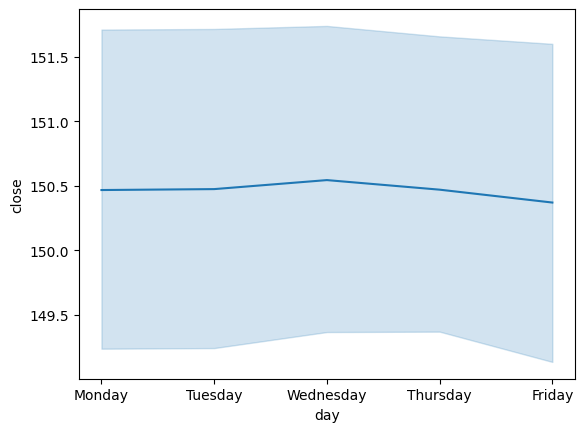

In [1]:
from models.seasonality.weekly import daily

daily("USDJPY")